In [3]:
import numpy as np
from scipy.optimize import minimize_scalar
from scipy.special import factorial, gammaincc, gamma
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
from scipy.special import gamma, gammainc
import h5py
from scipy.optimize import curve_fit
import os
import sys

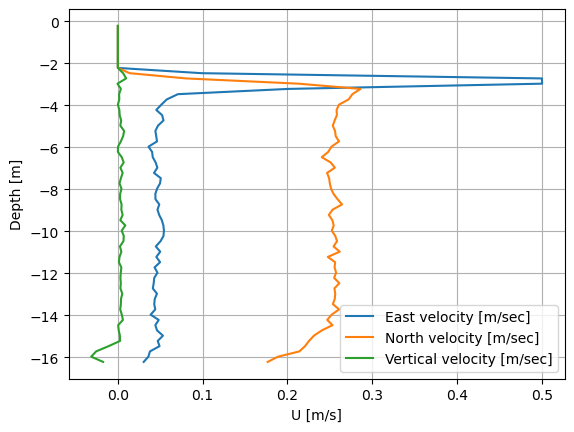

In [66]:
hf = h5py.File('C:\\Users\josep\Desktop\PHYC40900_Project TP\ADCP_19_01_22_04.mat', 'r')
east_vel = np.array(hf['East_vel'])
north_vel = np.array(hf['North_vel'])
vertical_vel = np.array(hf['Vertical_vel'])
z = np.array(hf['z_vec'])
t = hf['time_vec'][()]
hf.close()

time_start = 0*60 # sec
time_stop = 3*60 # sec
time_step = 1 #sec
start_i = int(time_start/time_step)
stop_i = int(time_stop/time_step)

east_vel_mean = np.mean(east_vel[start_i:stop_i], axis=0)
north_vel_mean = np.mean(north_vel[start_i:stop_i], axis=0)
vertical_vel_mean = np.mean(vertical_vel[start_i:stop_i], axis=0)

fig, ax = plt.subplots()
ax.plot(east_vel_mean, z, label='East velocity [m/sec]')
ax.plot(north_vel_mean, z, label='North velocity [m/sec]')
ax.plot(vertical_vel_mean, z, label='Vertical velocity [m/sec]')

plt.xlabel("U [m/s]")
plt.ylabel("Depth [m]")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
z.flatten()

array([-16.21156185, -15.96156185, -15.71156185, -15.46156185,
       -15.21156185, -14.96156185, -14.71156185, -14.46156185,
       -14.21156185, -13.96156185, -13.71156185, -13.46156185,
       -13.21156185, -12.96156185, -12.71156185, -12.46156185,
       -12.21156185, -11.96156185, -11.71156185, -11.46156185,
       -11.21156185, -10.96156185, -10.71156185, -10.46156185,
       -10.21156185,  -9.96156185,  -9.71156185,  -9.46156185,
        -9.21156185,  -8.96156185,  -8.71156185,  -8.46156185,
        -8.21156185,  -7.96156185,  -7.71156185,  -7.46156185,
        -7.21156185,  -6.96156185,  -6.71156185,  -6.46156185,
        -6.21156185,  -5.96156185,  -5.71156185,  -5.46156185,
        -5.21156185,  -4.96156185,  -4.71156185,  -4.46156185,
        -4.21156185,  -3.96156185,  -3.71156185,  -3.46156185,
        -3.21156185,  -2.96156185,  -2.71156185,  -2.46156185,
        -2.21156185,  -1.96156185,  -1.71156185,  -1.46156185,
        -1.21156185,  -0.96156185,  -0.71156185,  -0.46

In [6]:
directory = r'C:\\Users\josep\Desktop\PHYC40900_Project TP\ADCP_collection'

In [7]:
# Define time parameters
time_start = 0 * 60  # sec
time_stop = 15 * 60  # sec
time_step = 1  # sec
start_i = int(time_start / time_step)
stop_i = int(time_stop / time_step)

In [32]:
# Function to process each file
def process_file(file_path):
    with h5py.File(file_path, 'r') as hf:
        east_vel = np.array(hf['East_vel'])
        north_vel = np.array(hf['North_vel'])
        vertical_vel = np.array(hf['Vertical_vel'])

        east_vel_mean = np.mean(east_vel[start_i:stop_i], axis=0)
        north_vel_mean = np.mean(north_vel[start_i:stop_i], axis=0)
        vertical_vel_mean = np.mean(vertical_vel[start_i:stop_i], axis=0)

        z = np.array(hf['z_vec'])
        t = hf['time_vec'][()]
        
        return east_vel_mean, north_vel_mean, vertical_vel_mean, z

In [55]:
list_east_vel_mean = []
list_north_vel_mean = []
list_vertical_vel_mean = []
list_z = []

# Iterate over files in the directory
for filename in os.listdir(directory):
    if filename.startswith("ADCP_"):
        file_path = os.path.join(directory, filename)
        east_vel_mean, north_vel_mean, vertical_vel_mean, z = process_file(file_path)

        list_east_vel_mean.append(east_vel_mean)
        list_north_vel_mean.append(north_vel_mean)
        list_vertical_vel_mean.append(vertical_vel_mean)
        list_z.append(z.flatten())

In [56]:
len(list_east_vel_mean)

46

In [57]:
list_east_vel_mean[:2]

[array([0.05792351, 0.0881952 , 0.10105863, 0.1077209 , 0.10172787,
        0.10784257, 0.11003223, 0.09947827, 0.11140911, 0.10459054,
        0.10428895, 0.10586586, 0.09524046, 0.09639502, 0.09699973,
        0.09857076, 0.09691296, 0.09421055, 0.08890401, 0.08912062,
        0.08642657, 0.08982457, 0.09304315, 0.08999767, 0.08015051,
        0.0890447 , 0.08412731, 0.07565513, 0.07634257, 0.08113755,
        0.08515064, 0.08535003, 0.07032808, 0.06817518, 0.06884103,
        0.06410176, 0.06440391, 0.05864406, 0.05453606, 0.04732694,
        0.0457956 , 0.04261791, 0.04496784, 0.04194423, 0.03486386,
        0.04366672, 0.04415267, 0.04341086, 0.0667615 , 0.08611372,
        0.1279326 , 0.32366538, 0.6204957 , 0.71260816, 0.61289364,
        0.27731416, 0.05621599, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       dtype=float32),
 array([0.05792351, 0.0881952 , 0.10105863, 0.1077209 , 0.10172787,
        0.10784257, 0.11

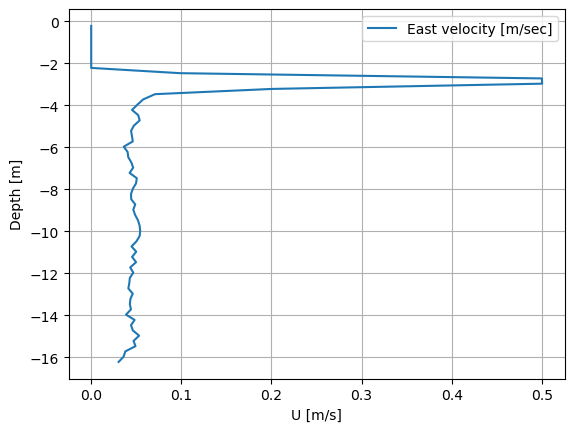

In [63]:
fig, ax = plt.subplots()
ax.plot(list_east_vel_mean[40], list_z[40], label='East velocity [m/sec]')
#ax.plot(north_vel_mean, z, label='North velocity [m/sec]')
#ax.plot(vertical_vel_mean, z, label='Vertical velocity [m/sec]')

plt.xlabel("U [m/s]")
plt.ylabel("Depth [m]")
plt.legend()
plt.grid(True)
plt.show()

In [64]:
list_z[:2]

[array([-16.10076812, -15.85076812, -15.60076812, -15.35076812,
        -15.10076812, -14.85076812, -14.60076812, -14.35076812,
        -14.10076812, -13.85076812, -13.60076812, -13.35076812,
        -13.10076812, -12.85076812, -12.60076812, -12.35076812,
        -12.10076812, -11.85076812, -11.60076812, -11.35076812,
        -11.10076812, -10.85076812, -10.60076812, -10.35076812,
        -10.10076812,  -9.85076812,  -9.60076812,  -9.35076812,
         -9.10076812,  -8.85076812,  -8.60076812,  -8.35076812,
         -8.10076812,  -7.85076812,  -7.60076812,  -7.35076812,
         -7.10076812,  -6.85076812,  -6.60076812,  -6.35076812,
         -6.10076812,  -5.85076812,  -5.60076812,  -5.35076812,
         -5.10076812,  -4.85076812,  -4.60076812,  -4.35076812,
         -4.10076812,  -3.85076812,  -3.60076812,  -3.35076812,
         -3.10076812,  -2.85076812,  -2.60076812,  -2.35076812,
         -2.10076812,  -1.85076812,  -1.60076812,  -1.35076812,
         -1.10076812,  -0.85076812,  -0.

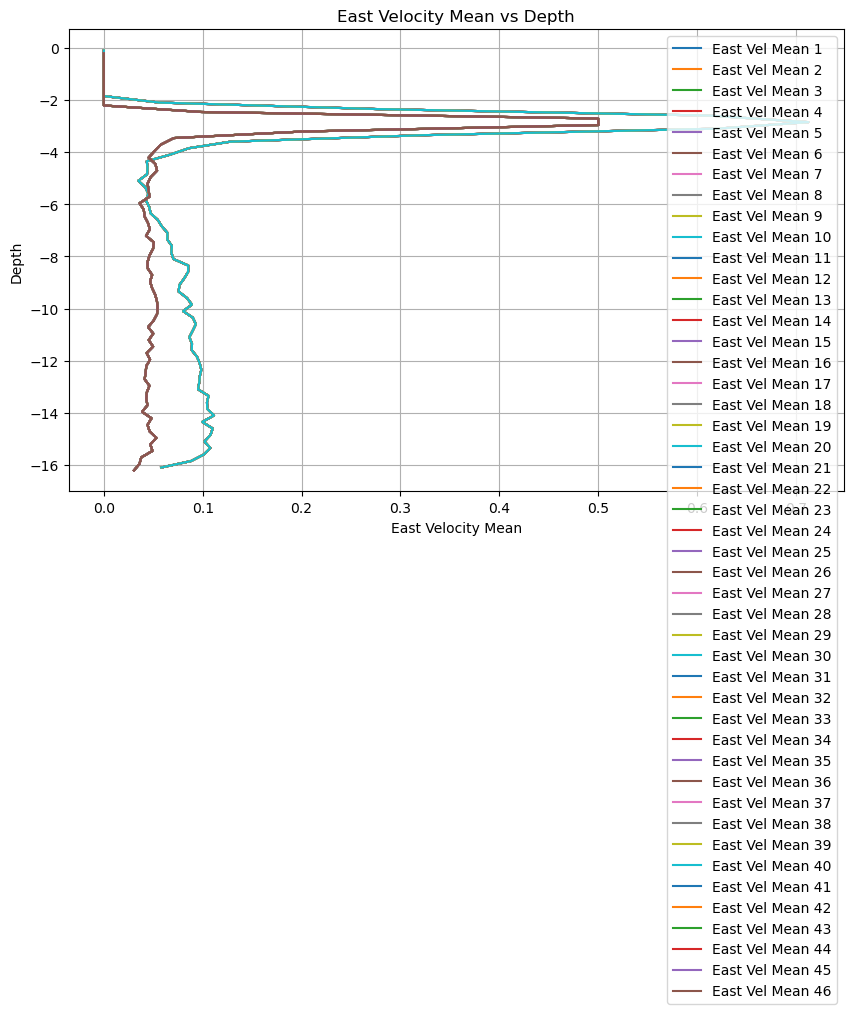

In [65]:
import matplotlib.pyplot as plt

# Assuming you have already defined list_east_vel_mean and list_z

# Plotting
plt.figure(figsize=(10, 6))

# Plotting east velocity mean
for i, east_vel_mean in enumerate(list_east_vel_mean):
    plt.plot(east_vel_mean, list_z[i], label=f'East Vel Mean {i+1}')

plt.xlabel('East Velocity Mean')
plt.ylabel('Depth')
plt.title('East Velocity Mean vs Depth')
plt.legend()
plt.grid(True)
plt.show()


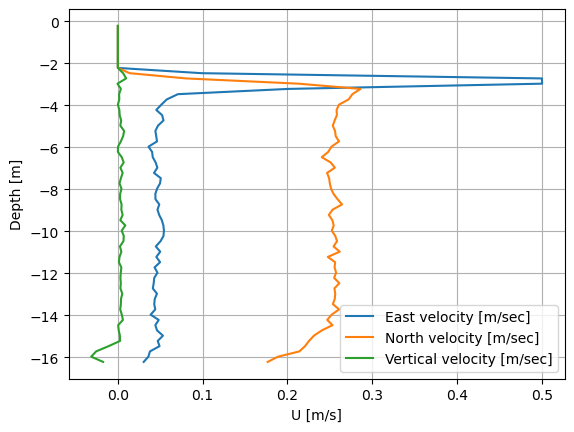

In [96]:
hf1 = h5py.File('C:\\Users\josep\Desktop\PHYC40900_Project TP\ADCP_collection\ADCP_2022012018.mat', 'r')
east_vel1 = np.array(hf1['East_vel'])
north_vel1 = np.array(hf1['North_vel'])
vertical_vel1 = np.array(hf1['Vertical_vel'])
z1 = np.array(hf1['z_vec'])
t1 = hf1['time_vec'][()]
hf.close()

hf2 = h5py.File('C:\\Users\josep\Desktop\PHYC40900_Project TP\ADCP_collection\ADCP_2022011902.mat', 'r')
east_vel2 = np.array(hf2['East_vel'])
north_vel2 = np.array(hf2['North_vel'])
vertical_vel2 = np.array(hf2['Vertical_vel'])
z2 = np.array(hf2['z_vec'])
t2 = hf2['time_vec'][()]
hf.close()

time_start = 0*60 # sec
time_stop = 3*60 # sec
time_step = 1 #sec
start_i = int(time_start/time_step)
stop_i = int(time_stop/time_step)

east_vel_mean1 = np.mean(east_vel1[start_i:stop_i], axis=0)
north_vel_mean1 = np.mean(north_vel1[start_i:stop_i], axis=0)
vertical_vel_mean1 = np.mean(vertical_vel1[start_i:stop_i], axis=0)

east_vel_mean2 = np.mean(east_vel2[start_i:stop_i], axis=0)
north_vel_mean2 = np.mean(north_vel2[start_i:stop_i], axis=0)
vertical_vel_mean2 = np.mean(vertical_vel2[start_i:stop_i], axis=0)

fig, ax = plt.subplots()
ax.plot(east_vel_mean1, z1, label='East velocity [m/sec]')
ax.plot(north_vel_mean1, z1, label='North velocity [m/sec]')
ax.plot(vertical_vel_mean1, z1, label='Vertical velocity [m/sec]')

#ax.plot(east_vel_mean2, z2, label='East velocity [m/sec]')
#ax.plot(north_vel_mean2, z2, label='North velocity [m/sec]')
#ax.plot(vertical_vel_mean2, z2, label='Vertical velocity [m/sec]')

plt.xlabel("U [m/s]")
plt.ylabel("Depth [m]")
plt.legend()
plt.grid(True)
plt.show()

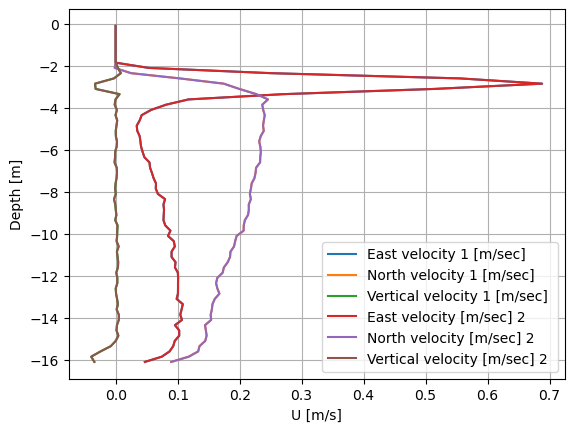

In [93]:
hf1 = h5py.File('C:\\Users\josep\Downloads\ADCP_collection\ADCP_2022011821.mat', 'r')
east_vel1 = np.array(hf1['East_vel'])
north_vel1 = np.array(hf1['North_vel'])
vertical_vel1 = np.array(hf1['Vertical_vel'])
z1 = np.array(hf1['z_vec'])
t1 = hf1['time_vec'][()]
hf.close()

hf2 = h5py.File('C:\\Users\josep\Downloads\ADCP_collection\ADCP_2022011916.mat', 'r')
east_vel2 = np.array(hf2['East_vel'])
north_vel2 = np.array(hf2['North_vel'])
vertical_vel2 = np.array(hf2['Vertical_vel'])
z2 = np.array(hf2['z_vec'])
t2 = hf2['time_vec'][()]
hf.close()

time_start = 0*60 # sec
time_stop = 15*60 # sec
time_step = 1 #sec
start_i = int(time_start/time_step)
stop_i = int(time_stop/time_step)

east_vel_mean1 = np.mean(east_vel1[start_i:stop_i], axis=0)
north_vel_mean1 = np.mean(north_vel1[start_i:stop_i], axis=0)
vertical_vel_mean1 = np.mean(vertical_vel1[start_i:stop_i], axis=0)

east_vel_mean2 = np.mean(east_vel2[start_i:stop_i], axis=0)
north_vel_mean2 = np.mean(north_vel2[start_i:stop_i], axis=0)
vertical_vel_mean2 = np.mean(vertical_vel2[start_i:stop_i], axis=0)

fig, ax = plt.subplots()
ax.plot(east_vel_mean1, z1, label='East velocity 1 [m/sec]')
ax.plot(north_vel_mean1, z1, label='North velocity 1 [m/sec]')
ax.plot(vertical_vel_mean1, z1, label='Vertical velocity 1 [m/sec]')

ax.plot(east_vel_mean2, z2, label='East velocity [m/sec] 2 ')
ax.plot(north_vel_mean2, z2, label='North velocity [m/sec] 2 ')
ax.plot(vertical_vel_mean2, z2, label='Vertical velocity [m/sec] 2 ')

plt.xlabel("U [m/s]")
plt.ylabel("Depth [m]")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
"C:\Users\josep\Desktop\PHYC40900_Project TP\ADCP_collection\ADCP_2022011821.mat"